In [347]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from read_roi import read_roi_zip
from read_roi import read_roi_file
from skimage.segmentation import find_boundaries
from zipfile import ZipFile
import cv2
import scipy.ndimage as ndimage    


In [348]:
folder = "/Users/dvarelat/Documents/MASTER/TFM/methods/division/SP8_ROIs/20190308_E4/169/DAPIdv"

In [346]:
image_path = "/Users/dvarelat/Documents/MASTER/TFM/methods/division/SP8_ROIs/20190308_E4/169/DAPIdv/20190308_E4_DAPIdv_169_v0.tif"
imv0 = Image.open(image_path)
image = np.array(imv0)
backtorgb = cv2.cvtColor(image, cv2. COLOR_GRAY2RGB)
backtorgb.shape
im = Image.fromarray(data)
im.save(image_path.replace(".tif", ".tif"))

NameError: name 'data' is not defined

In [118]:
os.listdir(folder)

['threshold_DAPIdv.txt',
 '20190308_E4_DAPIdv_169_dv.zip',
 '20190308_E4_DAPIdv_169_v0.tif',
 '20190308_E4_DAPIdv_169_v1.tif']

In [ ]:
total_cells = []
for i in ['20190308_E4', '20190201_E1', '20190403_E2', '20190208_E2', '20190401_E1']:
    f = os.listdir(os.path.join("/Users/dvarelat/Documents/MASTER/TFM/methods/division/SP8_ROIs", i))
    #print(f)
    for s in f:
        if s != ".DS_Store":
            print(s)
            inside = os.path.join(os.path.join("/Users/dvarelat/Documents/MASTER/TFM/methods/division/SP8_ROIs", i), s + "/DAPIdv")
            f_inside = os.listdir(inside)
            for x in f_inside:
                if ".zip" in x:
                    zipopen = read_roi_zip(os.path.join(inside, x))
                    total_cells.append(len(list(zipopen)))
                    print(len(list(zipopen)))
    print("----")

In [299]:
E = "20190401_E1"
N = "114"
os.listdir(os.path.join("/Users/dvarelat/Documents/MASTER/TFM/methods/division/SP8_ROIs", E))

['.DS_Store', '234', '334', '114']

In [300]:
folder = f"/Users/dvarelat/Documents/MASTER/TFM/methods/division/SP8_ROIs/{E}/{N}/DAPIdv"

In [301]:
os.path.isdir(folder)

True

In [302]:
imv0 = Image.open(os.path.join(folder, f'{E}_DAPIdv_{N}_v0.tif'))
imv1 = Image.open(os.path.join(folder, f'{E}_DAPIdv_{N}_v1.tif'))

imarrayv0 = np.array(imv0)
imarrayv1 = np.array(imv1)

In [303]:
mask = np.where(imarrayv1 != 0, 1, 0)
r_mask = ndimage.binary_fill_holes(find_boundaries(mask))

In [304]:
#roi = read_roi_file(roi_file_path)
rois = read_roi_zip(os.path.join(folder, f"{E}_DAPIdv_{N}_dv.zip"))

In [305]:
zeros = np.zeros(imarrayv0.shape)
list_rois = []
for roi in rois.keys():
    print(roi)
    coords = []
    for i in range(len(rois[roi]["x"])):
        coords.append([rois[roi]["y"][i], rois[roi]["x"][i]])
    coords = np.array(coords)
    zeros[coords[:, 0], coords[:, 1]] = 1
    list_rois.append(coords)

0001-1685-1287
0001-1080-1563
0001-1018-1686
0001-0977-1692
0001-1076-1617
0001-0785-1658
0001-0462-1776
0001-0302-1254
0001-0280-1245
0001-1335-1595
0001-1623-1424
0001-1673-1368
0001-1173-0648
0001-1773-1276
0577-0516
0803-0613
0321-1519
0406-1572
0398-1595
0001-1036-1707


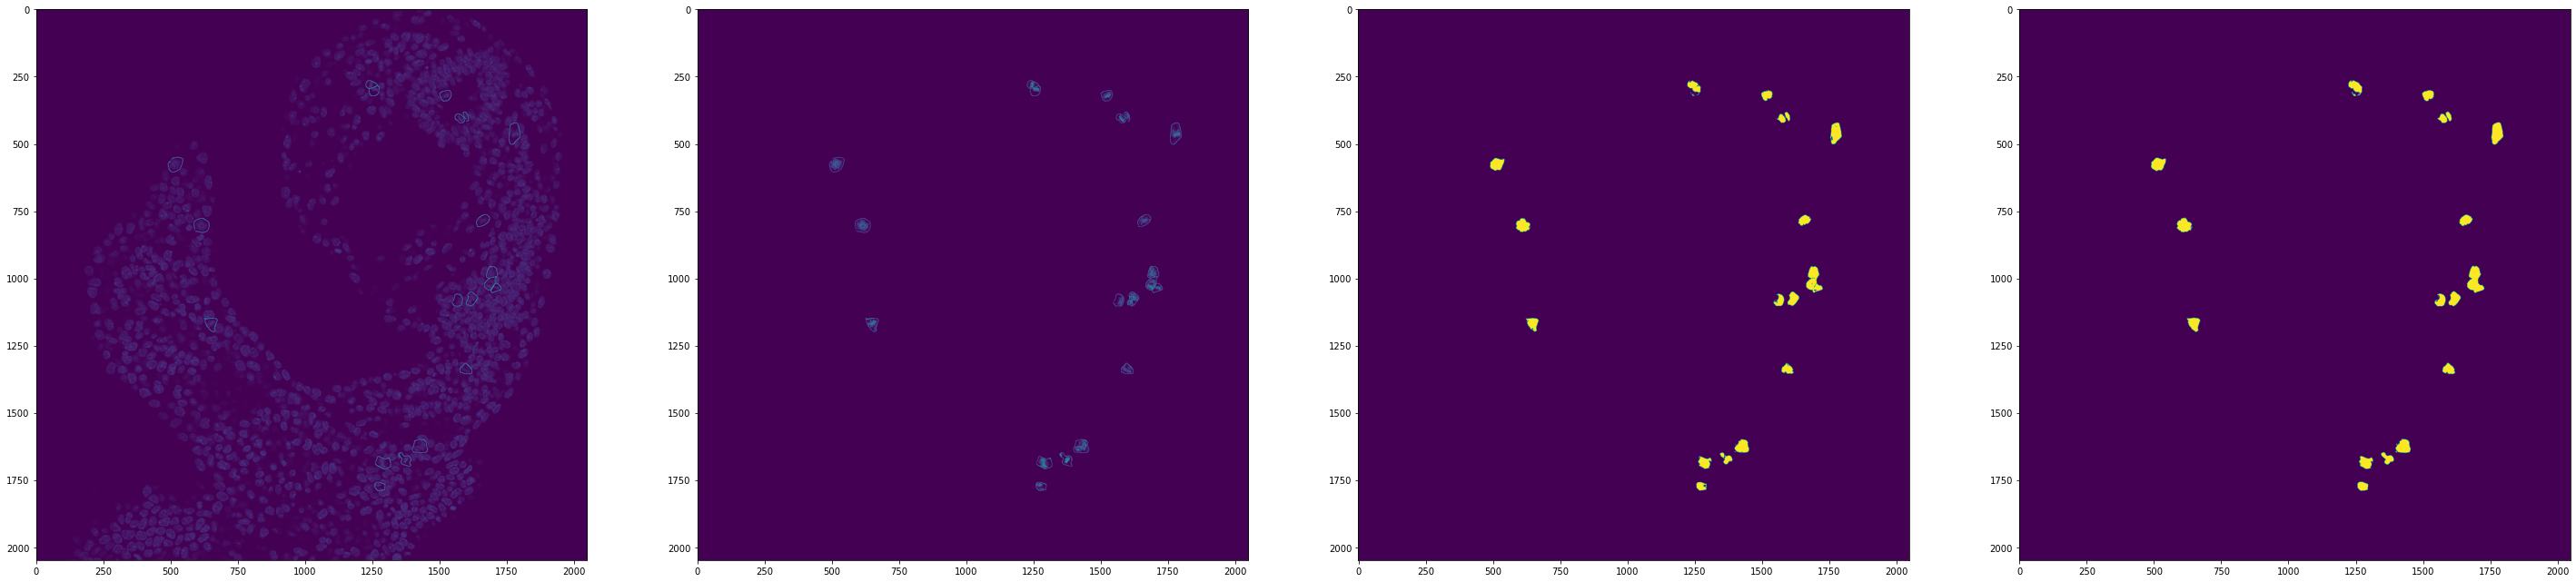

In [306]:
plt.figure(figsize=(50,50)) 
plots = [imarrayv0+ zeros*500,imarrayv1 + zeros*100,  mask, r_mask]
for i in range(len(plots)):
    plt.subplot(1,len(plots), i+1)
    plt.imshow(plots[i])

In [307]:
save = f"/Users/dvarelat/Documents/MASTER/TFM/methods/division/masks/{E}_DAPIdv_{N}_mask.tif"

In [308]:
im = Image.fromarray(r_mask)
im.save(save)

In [ ]:
z

In [21]:
np.unique(imarrayv0)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 119, 120, 121, 122, 124], dtype=uint8)

In [19]:
np.unique(imarrayv1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111], dtype=uint8)

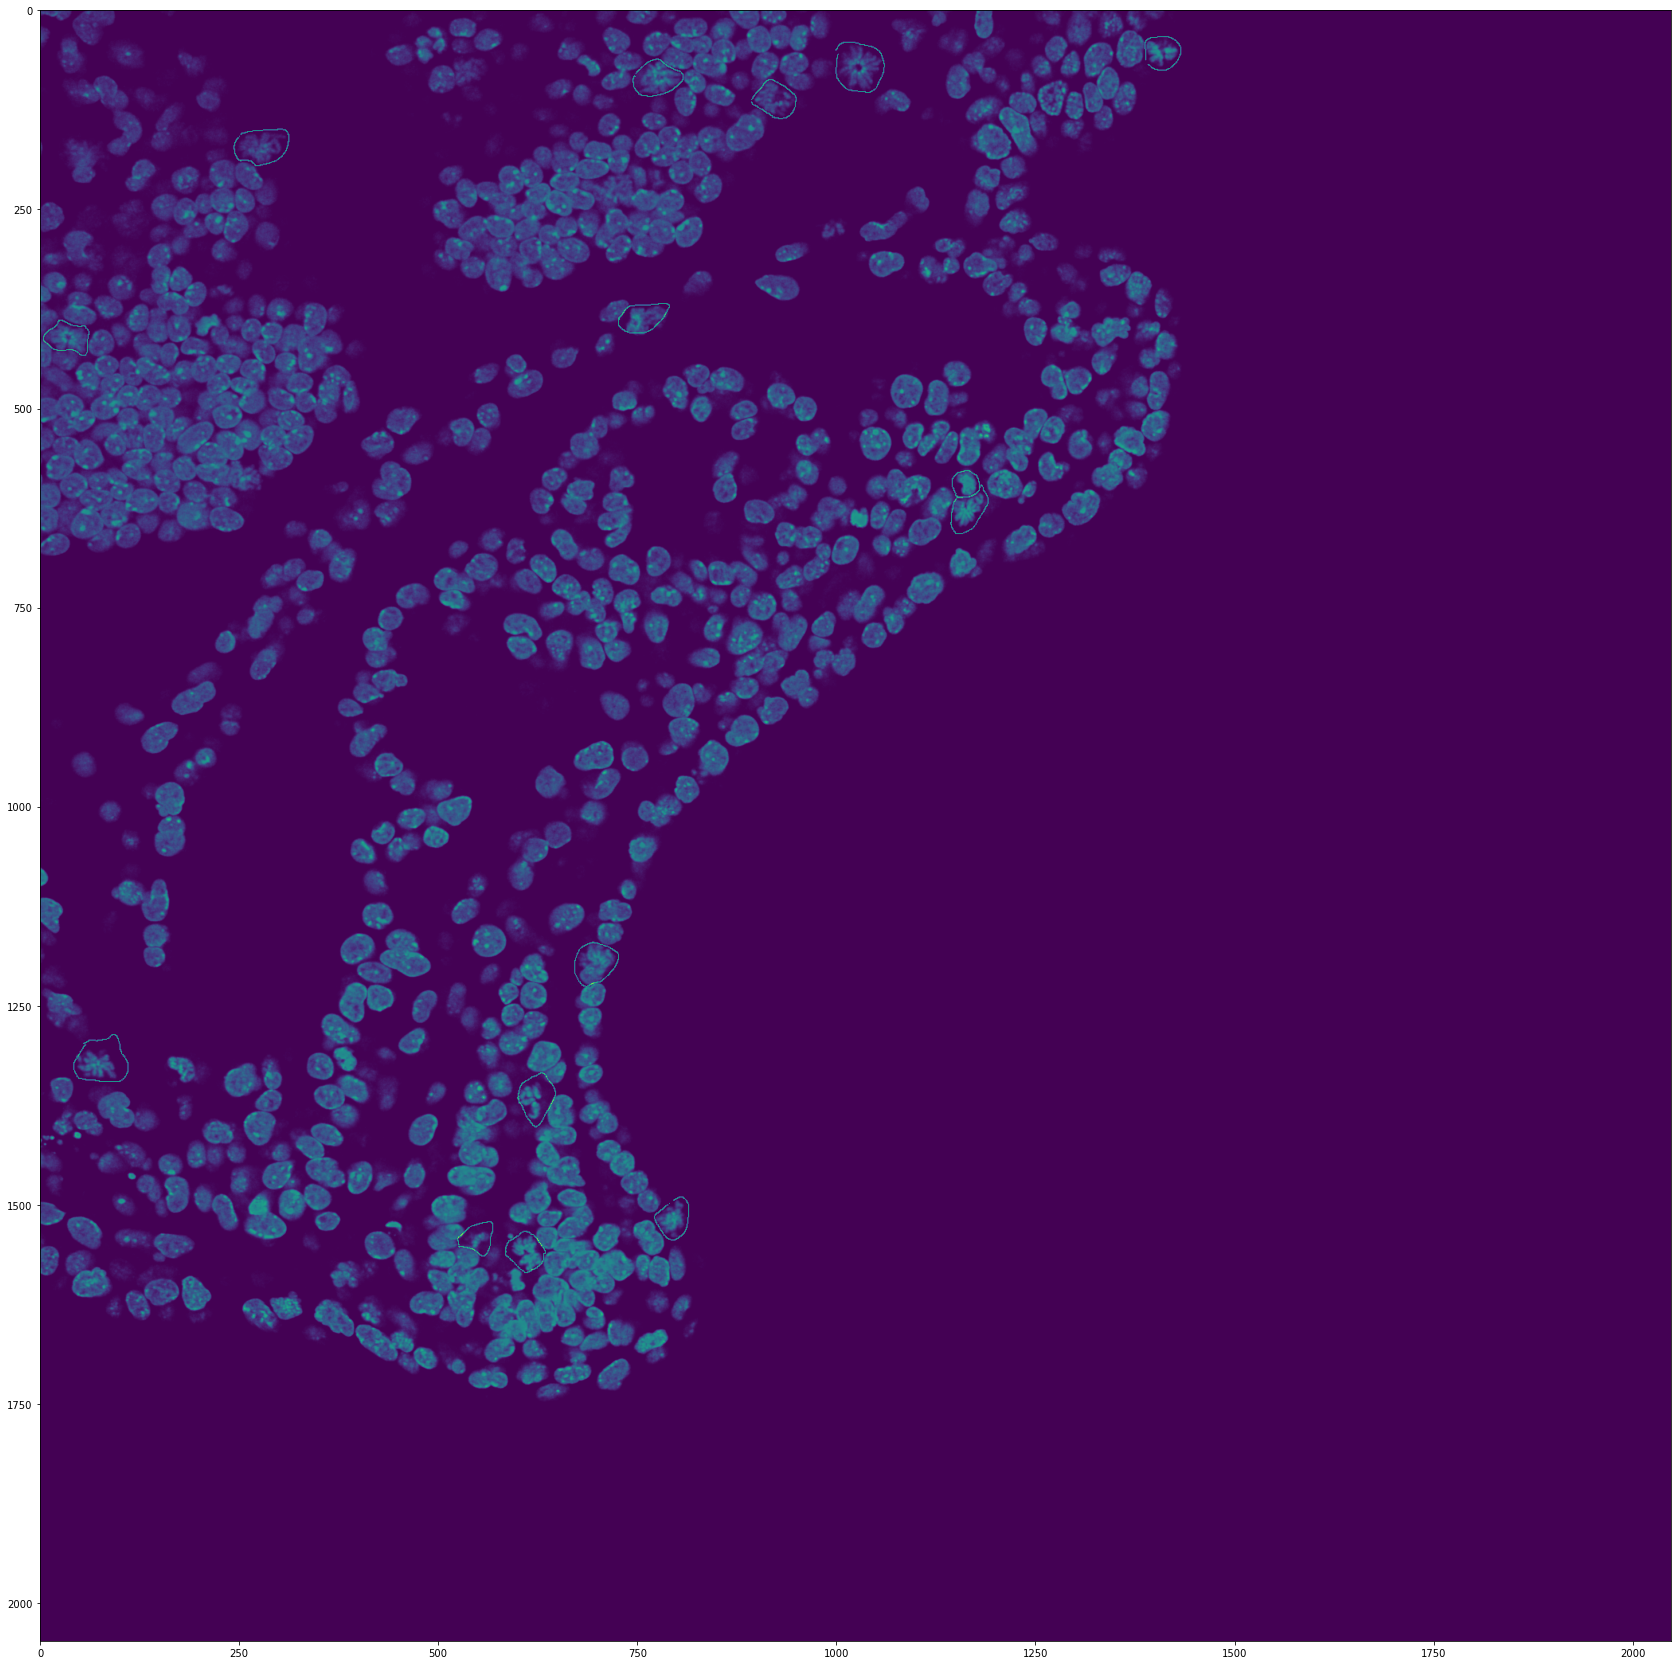

In [144]:
plt.figure(figsize=(30,30)) 
plt.imshow()

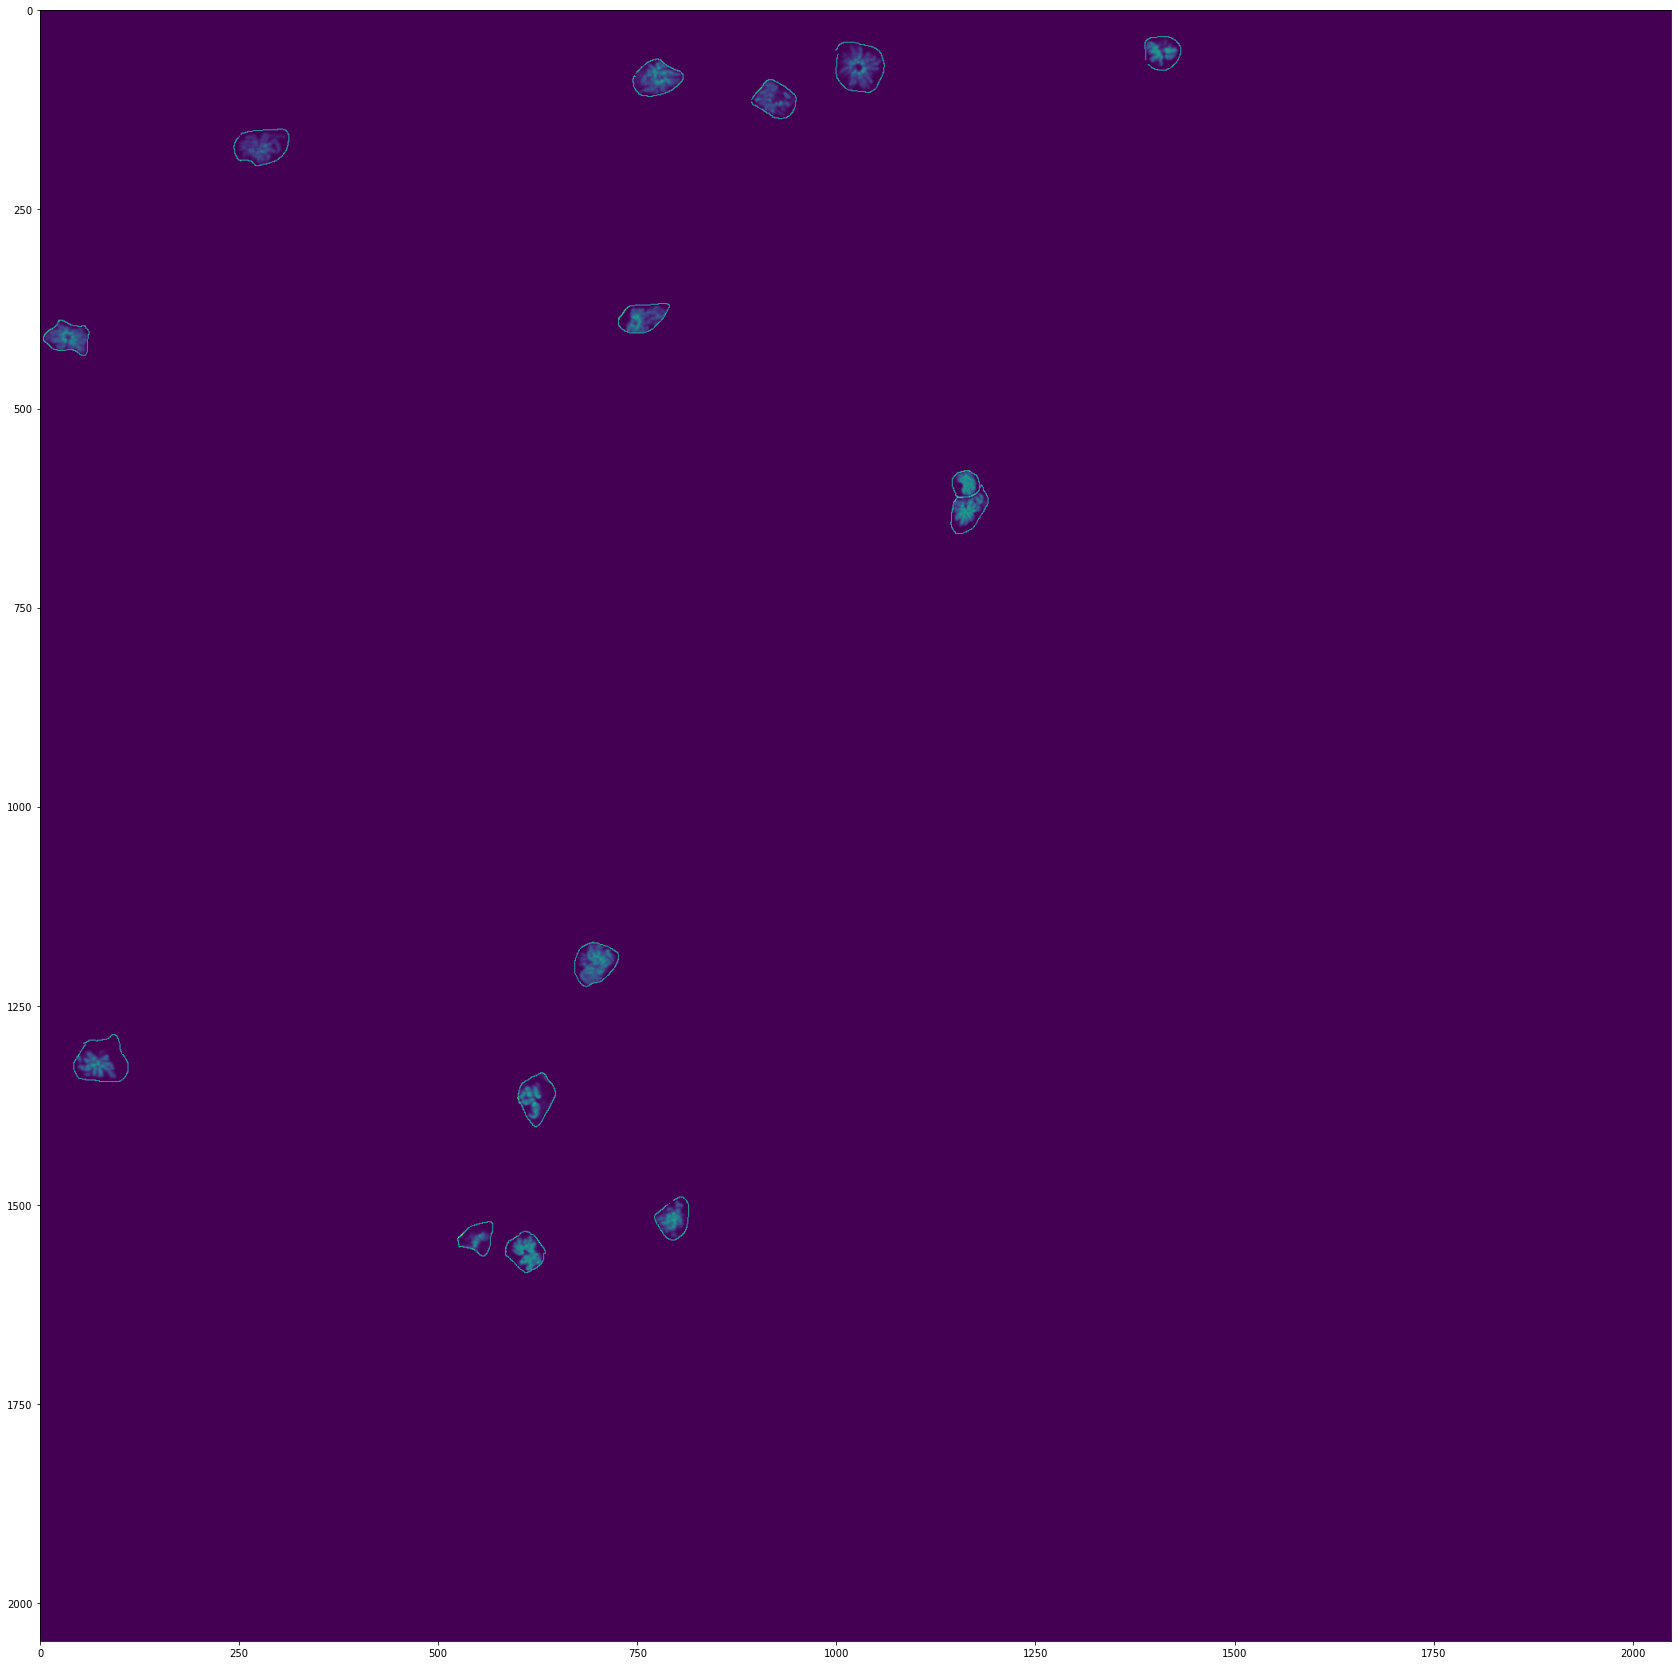

In [142]:
plt.figure(figsize=(30,30)) 
plt.imshow(imarrayv1 + zeros*100)

## SAVE RAWS

In [314]:
for E in ['20190308_E4', '20190201_E1', '20190403_E2', '20190208_E2', '20190401_E1']:
    print(E)
    ns = [x for x in os.listdir(os.path.join("/Users/dvarelat/Documents/MASTER/TFM/methods/division/SP8_ROIs", E)) if "." not in x]
    for N in ns:
        folder = f"/Users/dvarelat/Documents/MASTER/TFM/methods/division/SP8_ROIs/{E}/{N}/DAPIdv"
        file = os.path.join("/Users/dvarelat/Documents/MASTER/TFM/methods/division/raws", f'{E}_DAPIdv_{N}_v0.tif')
        print(file)
        imv0 = Image.open(os.path.join(folder, f'{E}_DAPIdv_{N}_v0.tif'))
        imarrayv0 = np.array(imv0)
        im = Image.fromarray(imarrayv0)
        im.save(file)

20190308_E4
/Users/dvarelat/Documents/MASTER/TFM/methods/division/raws/20190308_E4_DAPIdv_169_v0.tif
/Users/dvarelat/Documents/MASTER/TFM/methods/division/raws/20190308_E4_DAPIdv_314_v0.tif
/Users/dvarelat/Documents/MASTER/TFM/methods/division/raws/20190308_E4_DAPIdv_254_v0.tif
20190201_E1
/Users/dvarelat/Documents/MASTER/TFM/methods/division/raws/20190201_E1_DAPIdv_159_v0.tif
/Users/dvarelat/Documents/MASTER/TFM/methods/division/raws/20190201_E1_DAPIdv_456_v0.tif
20190403_E2
/Users/dvarelat/Documents/MASTER/TFM/methods/division/raws/20190403_E2_DAPIdv_164_v0.tif
/Users/dvarelat/Documents/MASTER/TFM/methods/division/raws/20190403_E2_DAPIdv_367_v0.tif
/Users/dvarelat/Documents/MASTER/TFM/methods/division/raws/20190403_E2_DAPIdv_238_v0.tif
20190208_E2
/Users/dvarelat/Documents/MASTER/TFM/methods/division/raws/20190208_E2_DAPIdv_199_v0.tif
/Users/dvarelat/Documents/MASTER/TFM/methods/division/raws/20190208_E2_DAPIdv_291_v0.tif
20190401_E1
/Users/dvarelat/Documents/MASTER/TFM/methods/divis

## FOR TRAINING

In [323]:
folderRAW = "/Users/dvarelat/Documents/MASTER/TFM/methods/division/raws"
folderMASK = "/Users/dvarelat/Documents/MASTER/TFM/methods/division/masks"
list_raw = [os.path.join(folderRAW, i) for i in os.listdir(folderRAW)]
list_masks = [os.path.join(folderMASK,r.replace("_v0.tif", "_mask.tif")) for r in os.listdir(folderRAW)]

In [345]:
Xtrain = []
ytrain = []
for i,raw in enumerate(list_raw[:10]):   
    imarrayv0 = np.array(Image.open(raw))
    image = cv2.resize(imarrayv0,(1024,1024))
    Xtrain.append(image)
    imarr = np.array(Image.open(list_masks[i])).astype("uint16")
    image2 = cv2.resize(imarr,(1024,1024))
    ytrain.append(image2)

In [344]:
imarr

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

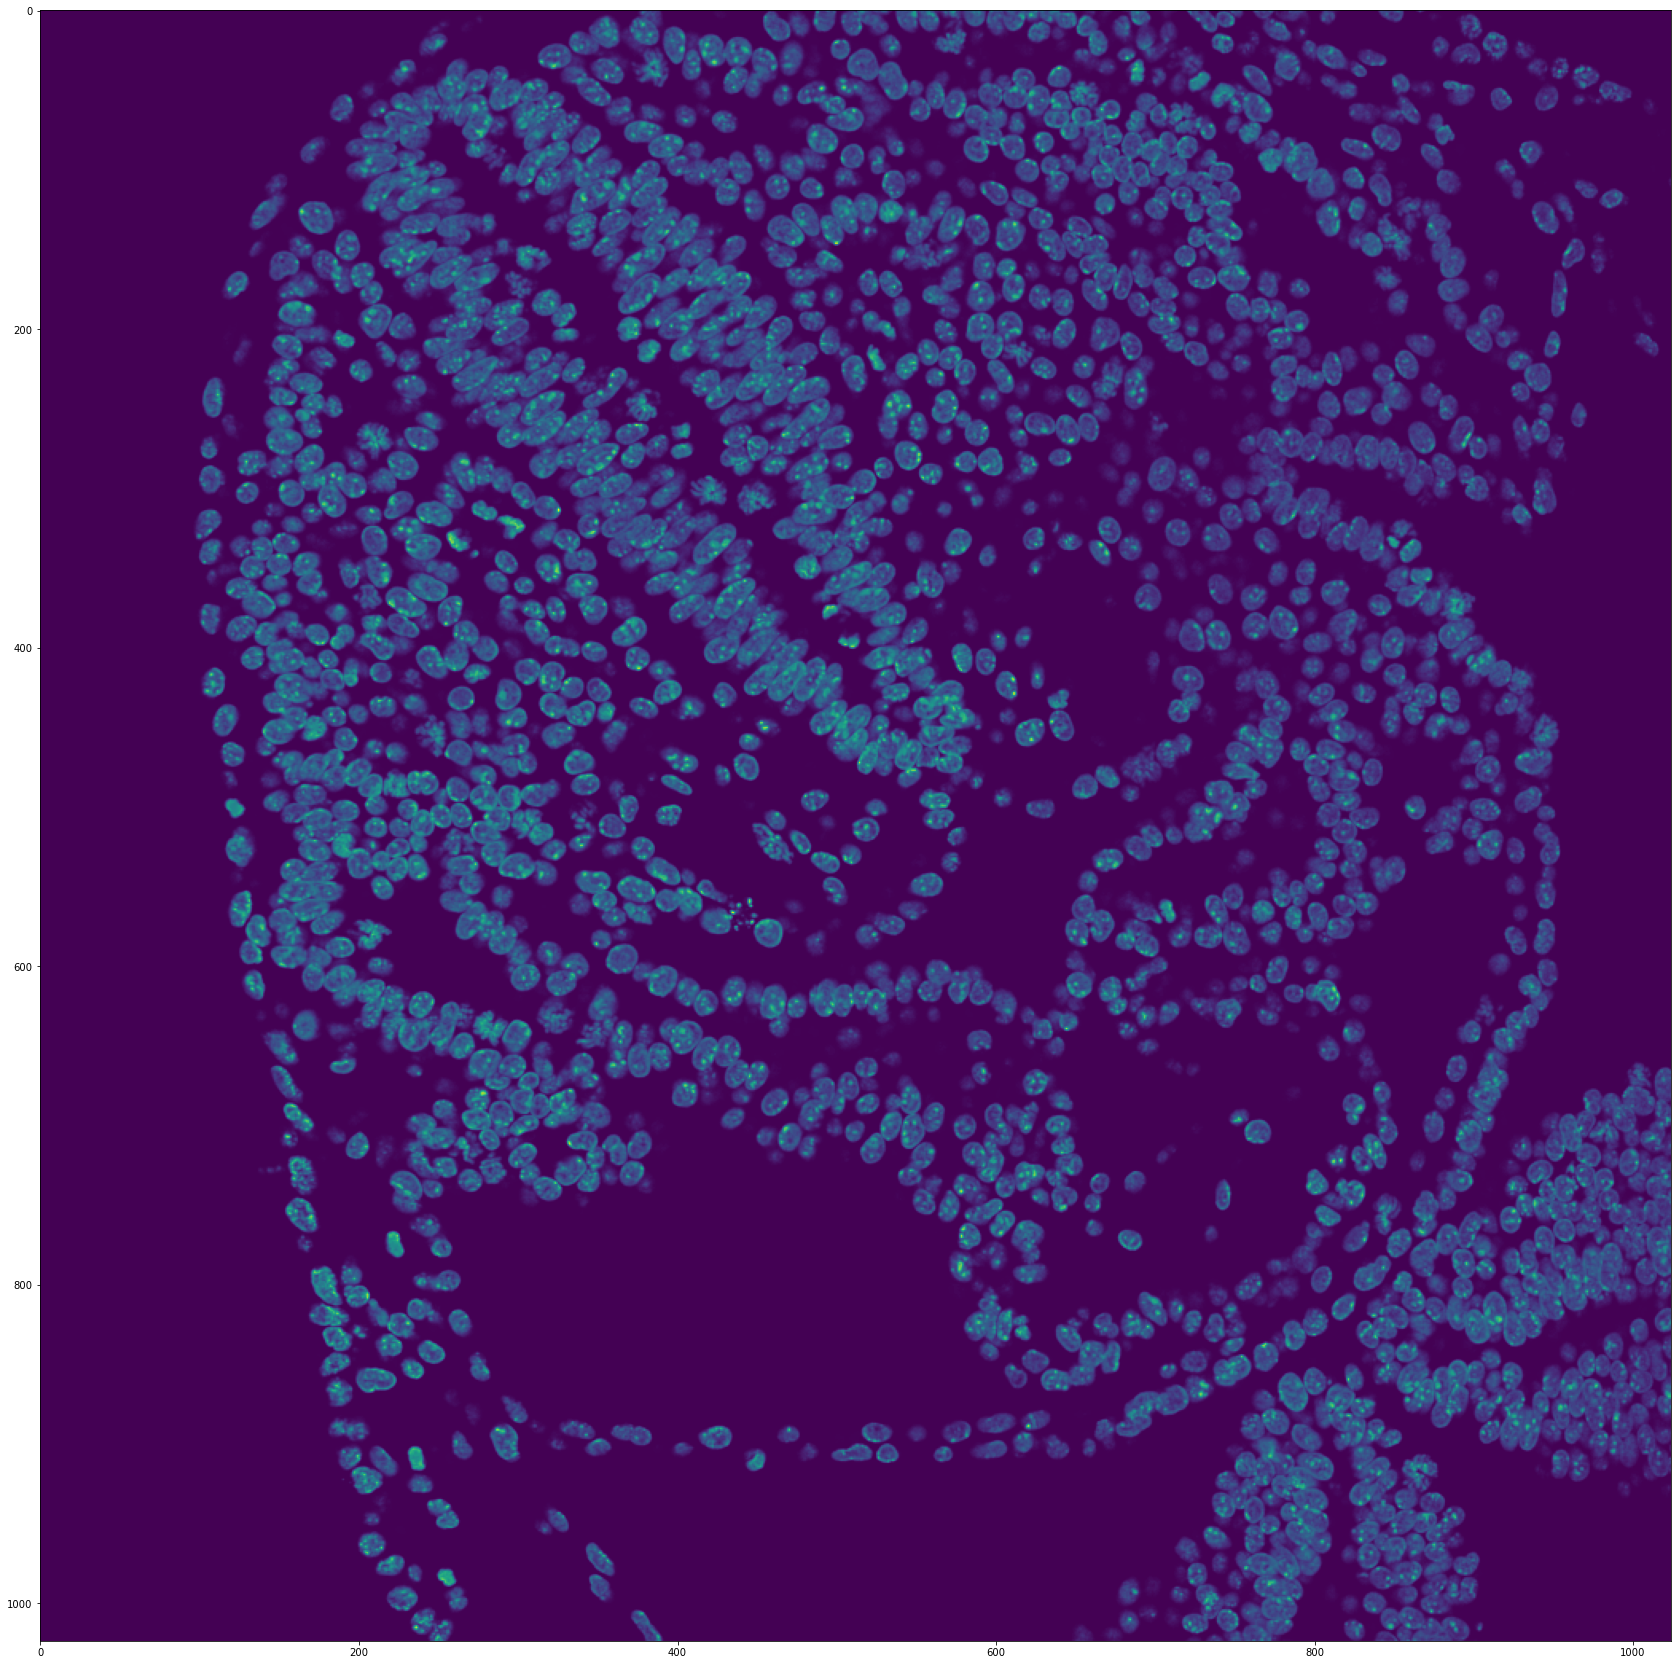

In [334]:
plt.figure(figsize=(30,30)) 
plt.imshow(image)